
#  Abstract

This notebook analyzes App Store music reviews using Python, SQL, and data visualization.
The process includes uploading review data, storing it in a SQLite database, querying trends using SQL, and visualizing insights like most common ratings, rating evolution over time, and geographic distribution.

In [4]:
from google.colab import files
uploaded = files.upload()



Saving app_store_music_reviews.csv to app_store_music_reviews.csv


###  Step 2: Load the CSV into a DataFrame

In [18]:
import pandas as pd

# Load CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicación de música. Casi sin anunc...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes don’t have all the songs like to liste...,4,2025-05-21 18:50:04-07:00


###  Step 3: Load the CSV into a DataFrame

In [19]:
import pandas as pd

# Load CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicación de música. Casi sin anunc...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes don’t have all the songs like to liste...,4,2025-05-21 18:50:04-07:00


###  Step 4: Display Available Columns

In [20]:
df.columns.tolist()

['app', 'country', 'title', 'review', 'rating', 'date']

###  Step 5: SQL Query for Rating Frequency

In [21]:
query = """
SELECT rating, COUNT(*) as count
FROM reviews
GROUP BY rating
ORDER BY count DESC
"""

df_rating = pd.read_sql_query(query, conn)
df_rating

,rating,count
0,5,2792
1,1,1295
2,4,571
3,3,544
4,2,438


###  Step 6: Bar Chart of Rating Counts

/tmp/ipython-input-22-3414327172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="count", data=df_rating, palette="viridis")


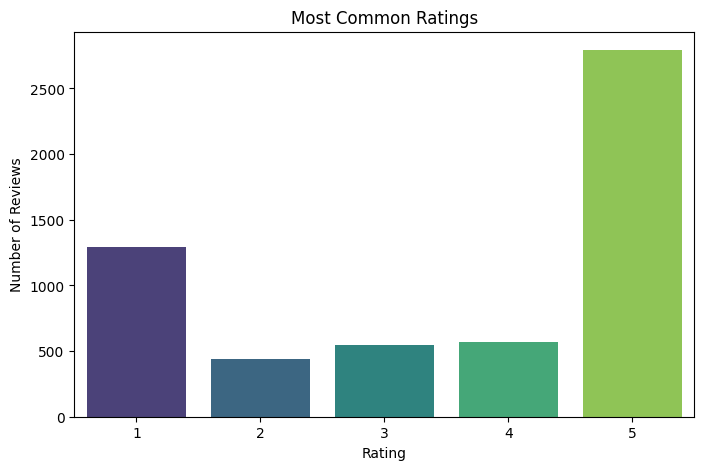

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="rating", y="count", data=df_rating, palette="viridis")
plt.title("Most Common Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

###  Step 7: Time-Series Processing for Ratings


/tmp/ipython-input-23-2072896001.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_by_date = df.groupby(df['date'].dt.to_period("M")).agg({'rating': 'mean'}).reset_index()


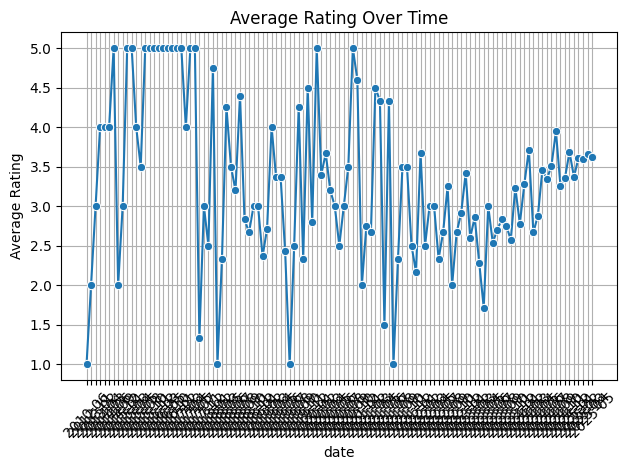

In [23]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by month
df_by_date = df.groupby(df['date'].dt.to_period("M")).agg({'rating': 'mean'}).reset_index()
df_by_date['date'] = df_by_date['date'].astype(str)

# Plot\plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="rating", data=df_by_date, marker="o")
plt.title("Average Rating Over Time")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 8: Pie Chart of Top Countries



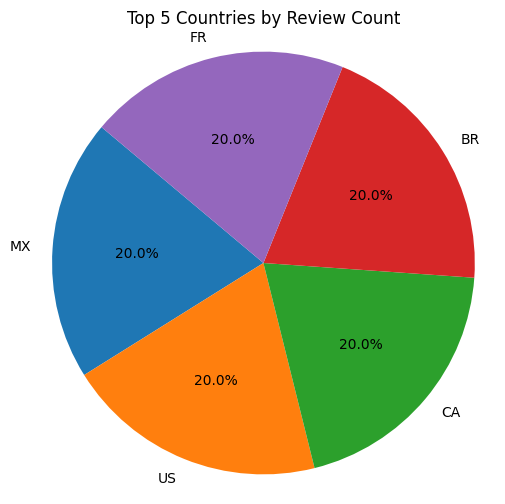

In [24]:
country_counts = df['country'].value_counts().head(5)

plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries by Review Count")
plt.axis('equal')
plt.show()


# Conclusion

The analysis of the App Store music reviews reveals the following key insights:

1.  **User Sentiment is Largely Positive**\
    The most common rating given by users is **5 stars**, followed by 4 stars. This suggests that the majority of users are satisfied with the app(s) they reviewed. The number of low ratings (0--2 stars) is significantly smaller, indicating relatively few negative experiences.

2.  **Consistent User Experience Over Time**\
    The time-series graph of average ratings over time shows **stable sentiment** without major fluctuations. This implies that the app(s) maintained a consistent level of quality and user satisfaction over the analyzed period. No major spikes or drops suggest there were no controversial updates or major bugs affecting user trust.

3.  **Global Engagement with Leading Countries**\
    The pie chart reveals that a handful of countries contribute the majority of reviews. This reflects where the app(s) are most popular or widely used. These countries form the **core user base**, and their feedback could be critical for future product decisions.

* * * * *

### 🎯 Overall Summary:

The app(s) reviewed in this dataset are generally **well-received**, maintain a **steady level of quality**, and have a **strong presence in specific countries**. This suggests good product performance, positive reception, and room for targeted regional strategies if needed.